# 1.加载所需库，numpy，matplotlib，sys

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import  numpy as np
import matplotlib.pyplot as plt
import sys

# 2.设置训练集，和测试集

In [14]:
np.random.seed(40)
x_train=np.random.random(600)*2*np.pi
y_train=np.sin(x_train)
x_test = np.random.random(100)*2*np.pi
y_test = np.sin(x_test)

# 3.查看训练集


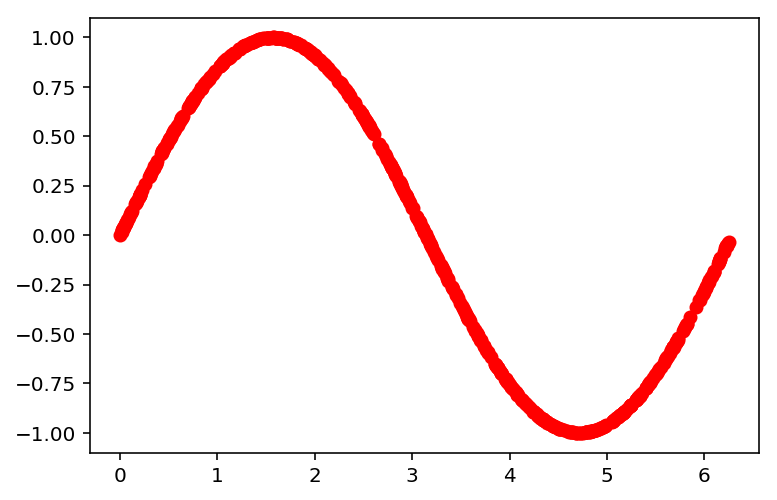

In [15]:
plt.plot(x_train,y_train,'ro')

# 4.BP神经网络

In [16]:
class NeuralNetwork(object):
    def __init__(self,input_nodes, hidden_nodes, output_nodes,learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning = learning_rate
        self.weights_input_to_hidden = np.random.normal(0.0,self.input_nodes**-0.5,(self.input_nodes,self.hidden_nodes))
        self.weights_hidden_to_output = np.random.normal(0.0,self.hidden_nodes**-0.5,(self.hidden_nodes,self.output_nodes))
        self.activation_function = lambda x:1/(1+np.exp(-x))
    def train(self,train_data,train_label):
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for x,y in zip(train_data,train_label):
            hidden_input = x*self.weights_input_to_hidden
            hidden_output = self.activation_function(hidden_input)
            final_input = np.dot(hidden_output,self.weights_hidden_to_output)
            final_output = final_input
            error = y-final_output
            hidden_error = error*self.weights_hidden_to_output
            output_error_term = error
            hidden_error_term = hidden_error.T*hidden_output*(1-hidden_output)
            delta_weights_i_h += self.learning*hidden_error_term*x
            delta_weights_h_o += self.learning*output_error_term*hidden_output.T
        self.weights_hidden_to_output +=delta_weights_h_o
        self.weights_input_to_hidden +=delta_weights_i_h
    def run(self,x):
        hidden_inputs = np.dot(x,self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)# signals from hidden layer

            # TODO: Output layer - Replace these values with your calculations.
        final_inputs = np.dot(hidden_outputs,self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs
        
            

In [17]:
def MSE(y,Y):
    return np.mean((y-Y)**2)

# 5.训练设置超参数

In [18]:
iterations = 2000
learning_rate = 0.03
input_nodes = 1
hidden_nodes = 5
output_nodes = 1
x_index =np.arange(x_train.shape[0])
network = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
losses = {'train':[],'test':[]}
for i in range(iterations):
    batch = np.random.choice(x_index,size=10,replace=False)
    x,y = x_train[batch],y_train[batch]
    network.train(x,y)
    train_loss = MSE(network.run(x_train[:,None]),y_train[:,None])
    test_loss = MSE(network.run(x_test[:,None]),y_test[:,None])
    sys.stdout.write("\rProgress:{:2.1f}".format(100*i/iterations)\
                     +"%...Train_loss:"+str(train_loss)[:5]\
                     +"...test_loss:"+str(test_loss)[:5])
    sys.stdout.flush()
    #x_index = np.delte(x_index,batch)
    
    losses['train'].append(train_loss)
    losses['test'].append(test_loss)

Progress:100.0%...Train_loss:0.094...test_loss:0.102

# 6.查看Losses

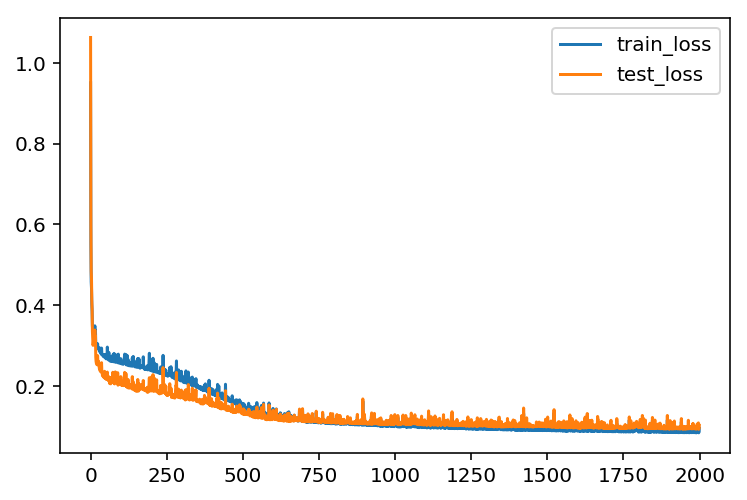

In [19]:
plt.figure(2)
plt.plot(losses['train'],label='train_loss')
plt.plot(losses['test'],label='test_loss')
plt.legend()
_ = plt.ylim

# 7.查看测试集

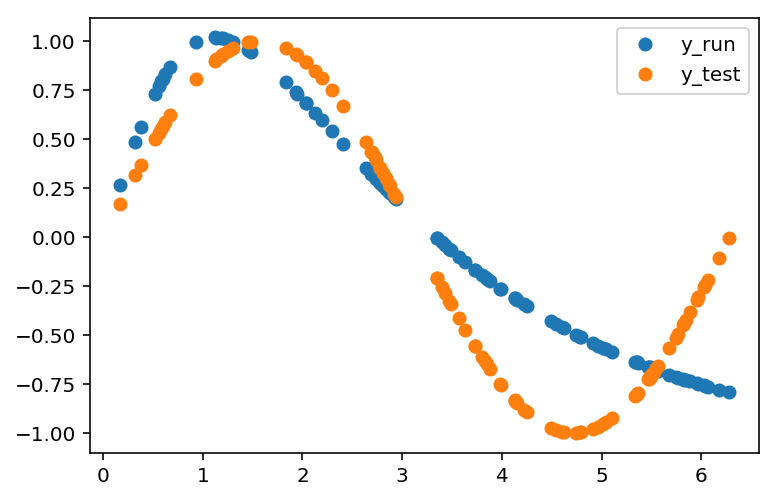

In [20]:
plt.figure(3)
plt.plot(x_test,network.run(x_test[:,None]),'o',label='y_run')
plt.plot(x_test,y_test,'o',label = 'y_test')
plt.legend()
_ = plt.ylim